In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names, na_values='?')

# Drop rows with missing values
data = data.dropna()

# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Define base estimators for the Stacking Classifier
base_estimators = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('dt', DecisionTreeClassifier())
]

# Create a Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=RandomForestClassifier())

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracy = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    stacking_classifier.fit(X_train, y_train)
    y_pred = stacking_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracy.append(accuracy)

    print(f"Fold Accuracy: {accuracy}")

# Print the mean accuracy across all folds
print(f"\nMean Accuracy: {np.mean(fold_accuracy)}")

Fold Accuracy: 0.6333333333333333
Fold Accuracy: 0.5666666666666667
Fold Accuracy: 0.5084745762711864
Fold Accuracy: 0.576271186440678
Fold Accuracy: 0.576271186440678

Mean Accuracy: 0.5722033898305086


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Confusion Matrix:
[[31  4  1  0  0]
 [ 1  3  3  1  1]
 [ 2  1  1  1  0]
 [ 1  3  1  1  1]
 [ 1  1  0  1  0]]


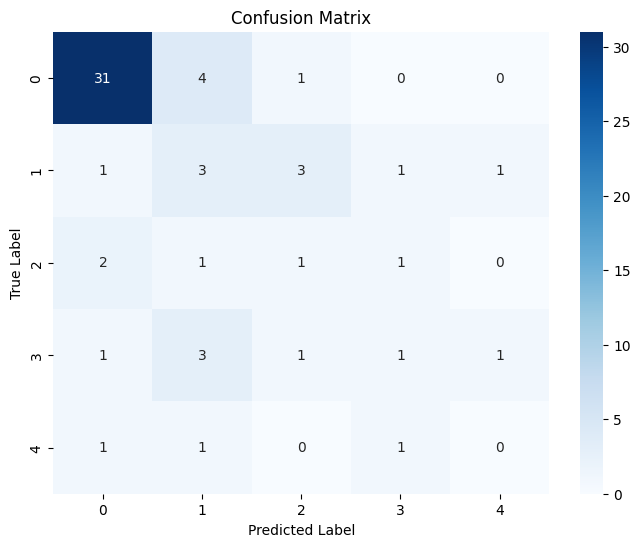


Other Evaluation Metrics:
Accuracy: 0.6
Precision: 0.3055555555555556
Recall: 0.30746031746031743
F1 Score: 0.3020923520923521


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names, na_values='?')

# Drop rows with missing values
data = data.dropna()

# Show the dataset
print(data.head())

# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convert target variable to integers if needed
y_train = y_train.astype(int)

# Choose a compatible estimator with RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the estimator
estimator = RandomForestClassifier()

# Initialize the RFE
rfe = RFE(estimator=estimator, n_features_to_select=10, step=1)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Initialize the XGBoost classifier
model = XGBClassifier()

# Fit the model on the training data with selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix showing each target label
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display other evaluation metrics
print("\nOther Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")




      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  target  
0      3.0  0.0   6

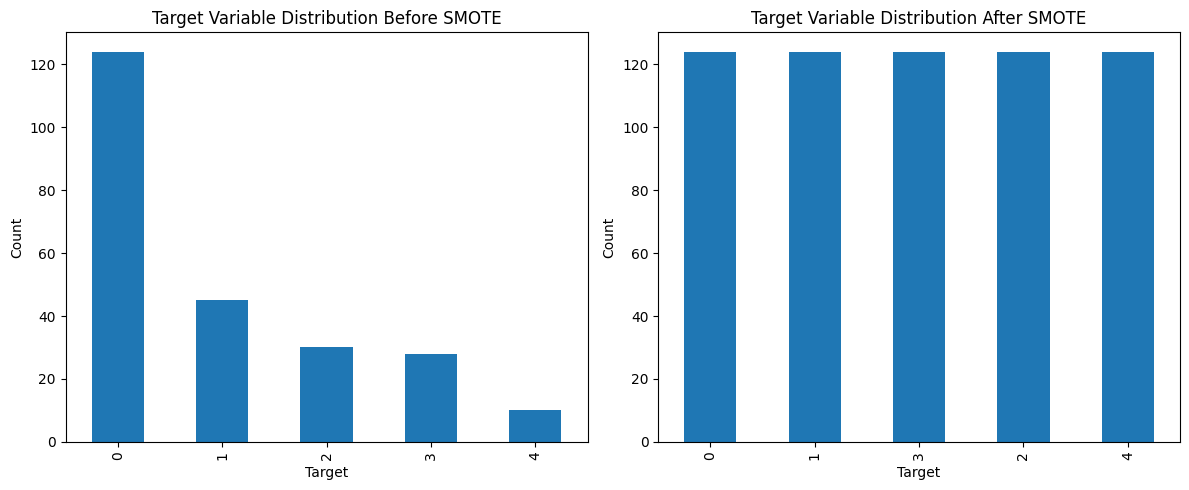


Confusion Matrix:
[[33  3  0  0  0]
 [ 1  2  3  2  1]
 [ 0  2  1  1  1]
 [ 1  3  0  1  2]
 [ 0  2  0  1  0]]


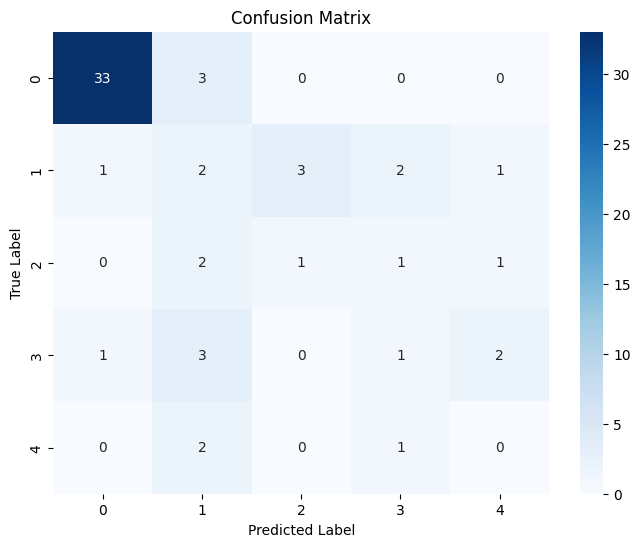


Other Evaluation Metrics:
Accuracy: 0.6166666666666667
Precision: 0.3119047619047619
Recall: 0.2963492063492063
F1 Score: 0.30178850883076236


In [ ]:
#apply some over sampling technique to balance the classes

# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Load the dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names, na_values='?')

# Drop rows with missing values
data = data.dropna()

# Show the dataset
print(data)

# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Convert target variable to integers if needed
y_train = y_train.astype(int)
# Import necessary libraries
import matplotlib.pyplot as plt

# Visualize the target variable before SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Target Variable Distribution Before SMOTE')
y_train.value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')



# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize the target variable after SMOTE
plt.subplot(1, 2, 2)
plt.title('Target Variable Distribution After SMOTE')
y_train_resampled.value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Choose a compatible estimator with RFE
estimator = RandomForestClassifier()

# Initialize the RFE
rfe = RFE(estimator=estimator, n_features_to_select=10, step=1)

# Fit RFE on the resampled training data
rfe.fit(X_train_resampled, y_train_resampled)

# Get the selected features
X_train_selected = rfe.transform(X_train_resampled)
X_test_selected = rfe.transform(X_test)

# Initialize the XGBoost classifier
model = XGBClassifier()

# Fit the model on the training data with selected features
model.fit(X_train_selected, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix showing each target label
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display other evaluation metrics
print("\nOther Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
#Stacking of classifier
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names, na_values='?')

# Drop rows with missing values
data = data.dropna()

# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Define base estimators for the Stacking Classifier
base_estimators = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('dt', DecisionTreeClassifier())
]

# Create a Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=RandomForestClassifier())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Convert target variable to integers if needed
y_train = y_train.astype(int)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


AttributeError: 'StackingClassifier' object has no attribute 'estimators_'